In [1]:
%reload_ext autoreload
%autoreload 2

from alphadia.extraction.candidateselection import GaussianFilter
from alphadia.extraction import data, hybridselection
from alphadia.extraction.numba import numeric

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
raw_files = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804.d'

dia_data = data.TimsTOFTranspose(raw_files)

0:01:02.061592  INFO: Importing data from /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804.d
0:01:02.062482  INFO: Using .d import for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804.d
0:01:02.062830  INFO: Reading frame metadata for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804.d
0:01:02.529402  INFO: Reading 16,348 frames with 4,282,442,338 detector events for /Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804.d
100%|██████████| 16348/16348 [00:18<00:00, 885.86it/s] 
0:01:21.165500  INFO: Indexing /Users/georgwallm

In [7]:
fragments_flat = pd.read_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804.fragments_flat.tsv', sep='\t')
precursors_flat = pd.read_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804.precursors_flat.tsv', sep='\t')


In [12]:
psm_df = pd.read_csv('/Users/georgwallmann/Documents/data/alphadia_benchmarking/raw_data/2023_04_27_synchroPasef_mDIA/20230422_TIMS05_PaSk_MCT_SA_HeLa_mDIA_SyP_2scans_each150Da_S2-B6_1_1804.d.tsv', sep='\t')

In [13]:
psm_df

,Unnamed: 0,precursor_idx,elution_group_idx,charge,rank,scan_start,scan_stop,scan_center,frame_start,frame_stop,...,rt_library,rt_calibrated,rt_error,mobility_library,mobility_calibrated,mobility_error,proteins,channel,proba,qval
0,51931,226677,7434,3,0,392,431,411,14242,14323,...,1516.699944,1629.579280,-4.710505,1.060460,1.025528,0.008739,P31327-3,0,1.784865e-08,0.000000
1,242080,213928,34731,3,0,512,597,569,7915,8029,...,806.917986,905.102525,3.246352,0.952401,0.929298,0.002814,P62263,0,5.045463e-08,0.000000
2,25413,216141,3645,2,0,182,259,224,5047,5134,...,549.977367,597.762887,-18.333139,1.185024,1.149726,0.005446,P80723,0,7.235425e-08,0.000000
3,295480,223932,42379,3,0,400,486,429,14323,14419,...,1514.891853,1628.518246,6.246280,1.035596,1.001699,0.020930,P07437,0,8.455195e-08,0.000000
4,90492,221844,12953,3,0,557,588,572,5848,5923,...,606.980315,671.108859,-1.265048,0.950775,0.927938,0.002234,Q01844-3,0,1.108085e-07,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42620,163389,183655,23447,2,1,360,376,371,11653,11680,...,1119.389025,1302.071220,25.273994,1.125912,1.089471,-0.029342,Q86UE4,0,9.370765e-01,0.069215
42621,136294,159142,19579,2,1,473,490,482,6514,6535,...,692.902330,767.749451,-25.224610,1.050683,1.016031,-0.027669,Q9BY89,0,9.399885e-01,0.069235
42622,122871,214475,17627,3,0,366,416,390,13954,14029,...,1398.221836,1581.321431,9.079692,1.099645,1.063592,-0.015747,P08238,0,9.453690e-01,0.069235
42623,12179,151893,1751,2,0,468,517,492,12136,12163,...,1169.089293,1366.392564,15.883925,1.023471,0.990547,-0.008650,P49419-2,0,9.538756e-01,0.069255


In [37]:
from alphadia.extraction import hybridselection
from alphadia.extraction import scoring
from alphadia.extraction import quadrupole

precursors_sample = precursors_flat[precursors_flat['precursor_idx'].isin([226677,216141])]

config = hybridselection.HybridCandidateConfig()
config.update({
    'rt_tolerance':30.,
    'mobility_tolerance': 0.03,
    'candidate_count': 5,
    'mz_tolerance': 15,
    'sigma_scale_rt': 0.5,
    'peak_len_mobility': 0.01,
    'sigma_scale_mobility': 1,
    'min_size_rt': 3,
    'min_size_mobility': 12,
    'f_mobility': 1.0,
    'center_fraction': 0.2
})

print(config)

extraction = hybridselection.HybridCandidateSelection(
    dia_data.jitclass(),
    precursors_sample,
    fragments_flat,
    config.jitclass(),
    rt_column = f'rt_calibrated',
    mobility_column = f'mobility_calibrated',
    precursor_mz_column = f'mz_calibrated',
    fragment_mz_column = f'mz_calibrated',
    debug=False,
    mz_tolerance = 15,
    thread_count=10
)
candidates_df = extraction()




0:25:29.459172  INFO: Duty cycle consists of 3 frames, 0.34 seconds cycle time
0:25:29.459458  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
0:25:29.459655  INFO: Expected peak length in RT is 10.00 seconds, sigma is 7.32
0:25:29.459887  INFO: Expected peak length in mobility is 0.01 1/K_0, sigma is 7.73


rt_tolerance: 30.0 
mz_tolerance: 15.0 
mobility_tolerance: 0.03 
isotope_tolerance: 0.01 
peak_len_rt: 10.0 
sigma_scale_rt: 0.5 
peak_len_mobility: 0.01 
sigma_scale_mobility: 1.0 
candidate_count: 5 
top_k_precursors: 3 
top_k_fragments: 12 
max_cardinality: 10 
kernel_size: 30 
f_mobility: 1.0 
f_rt: 0.99 
center_fraction: 0.2 
min_size_mobility: 12 
min_size_rt: 3 
max_size_mobility: 50 
max_size_rt: 15 
group_channels: False 
use_weighted_score: True 
join_close_candidates: True 
join_close_candidates_scan_threshold: 0.01 
join_close_candidates_cycle_threshold: 0.6 
feature_std: [1.57582333e+00 4.86002185e-01 5.75864457e-01 5.88348741e+02
 1.46839315e-02 4.23830325e-02 1.13689671e-02 2.01410664e+00
 1.58700245e-01 9.42586444e-02 9.42647912e-02 9.44558672e-02] 
feature_mean: [ 2.99270939  1.81605299  1.55059098 20.70651981  0.14824355  0.45525489
  0.09375865  4.17304869  1.4260253   0.51439743  0.50651637  0.49794463] 
feature_weight: [0.41875882 0.27491423 0.04876592 0.         

100%|██████████| 1/1 [00:00<00:00, 78.93it/s]


  0%|          | 0/3 [00:00<?, ?it/s]

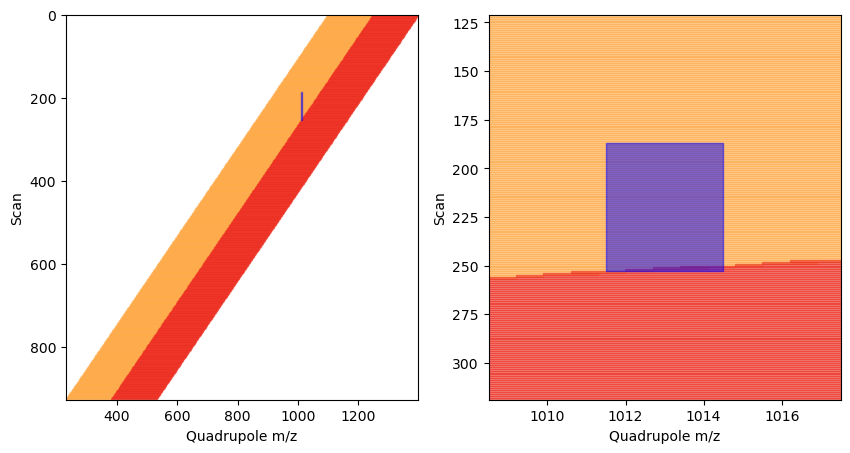

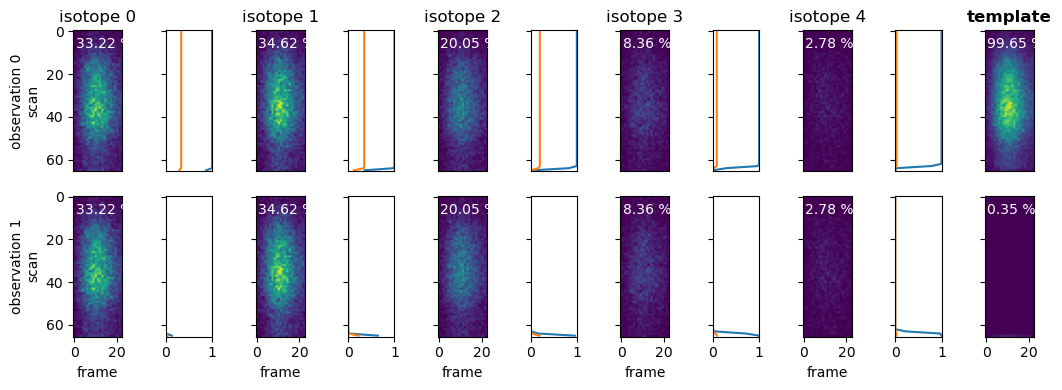

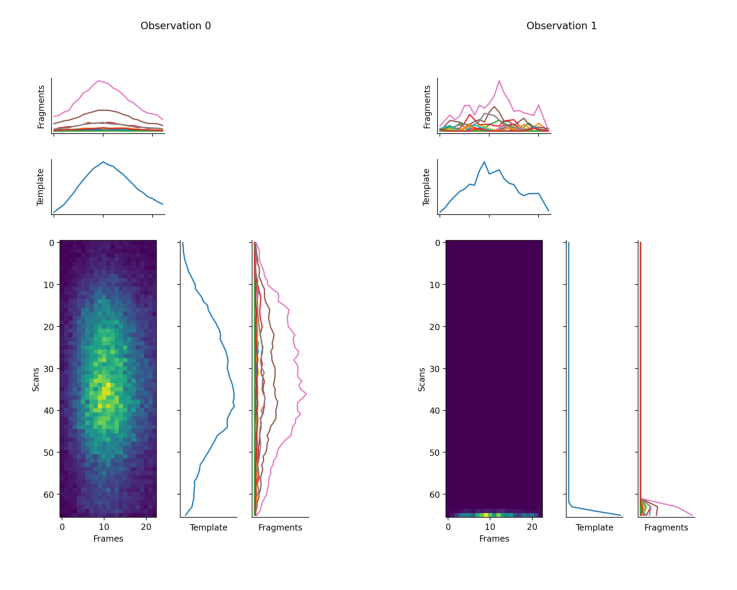

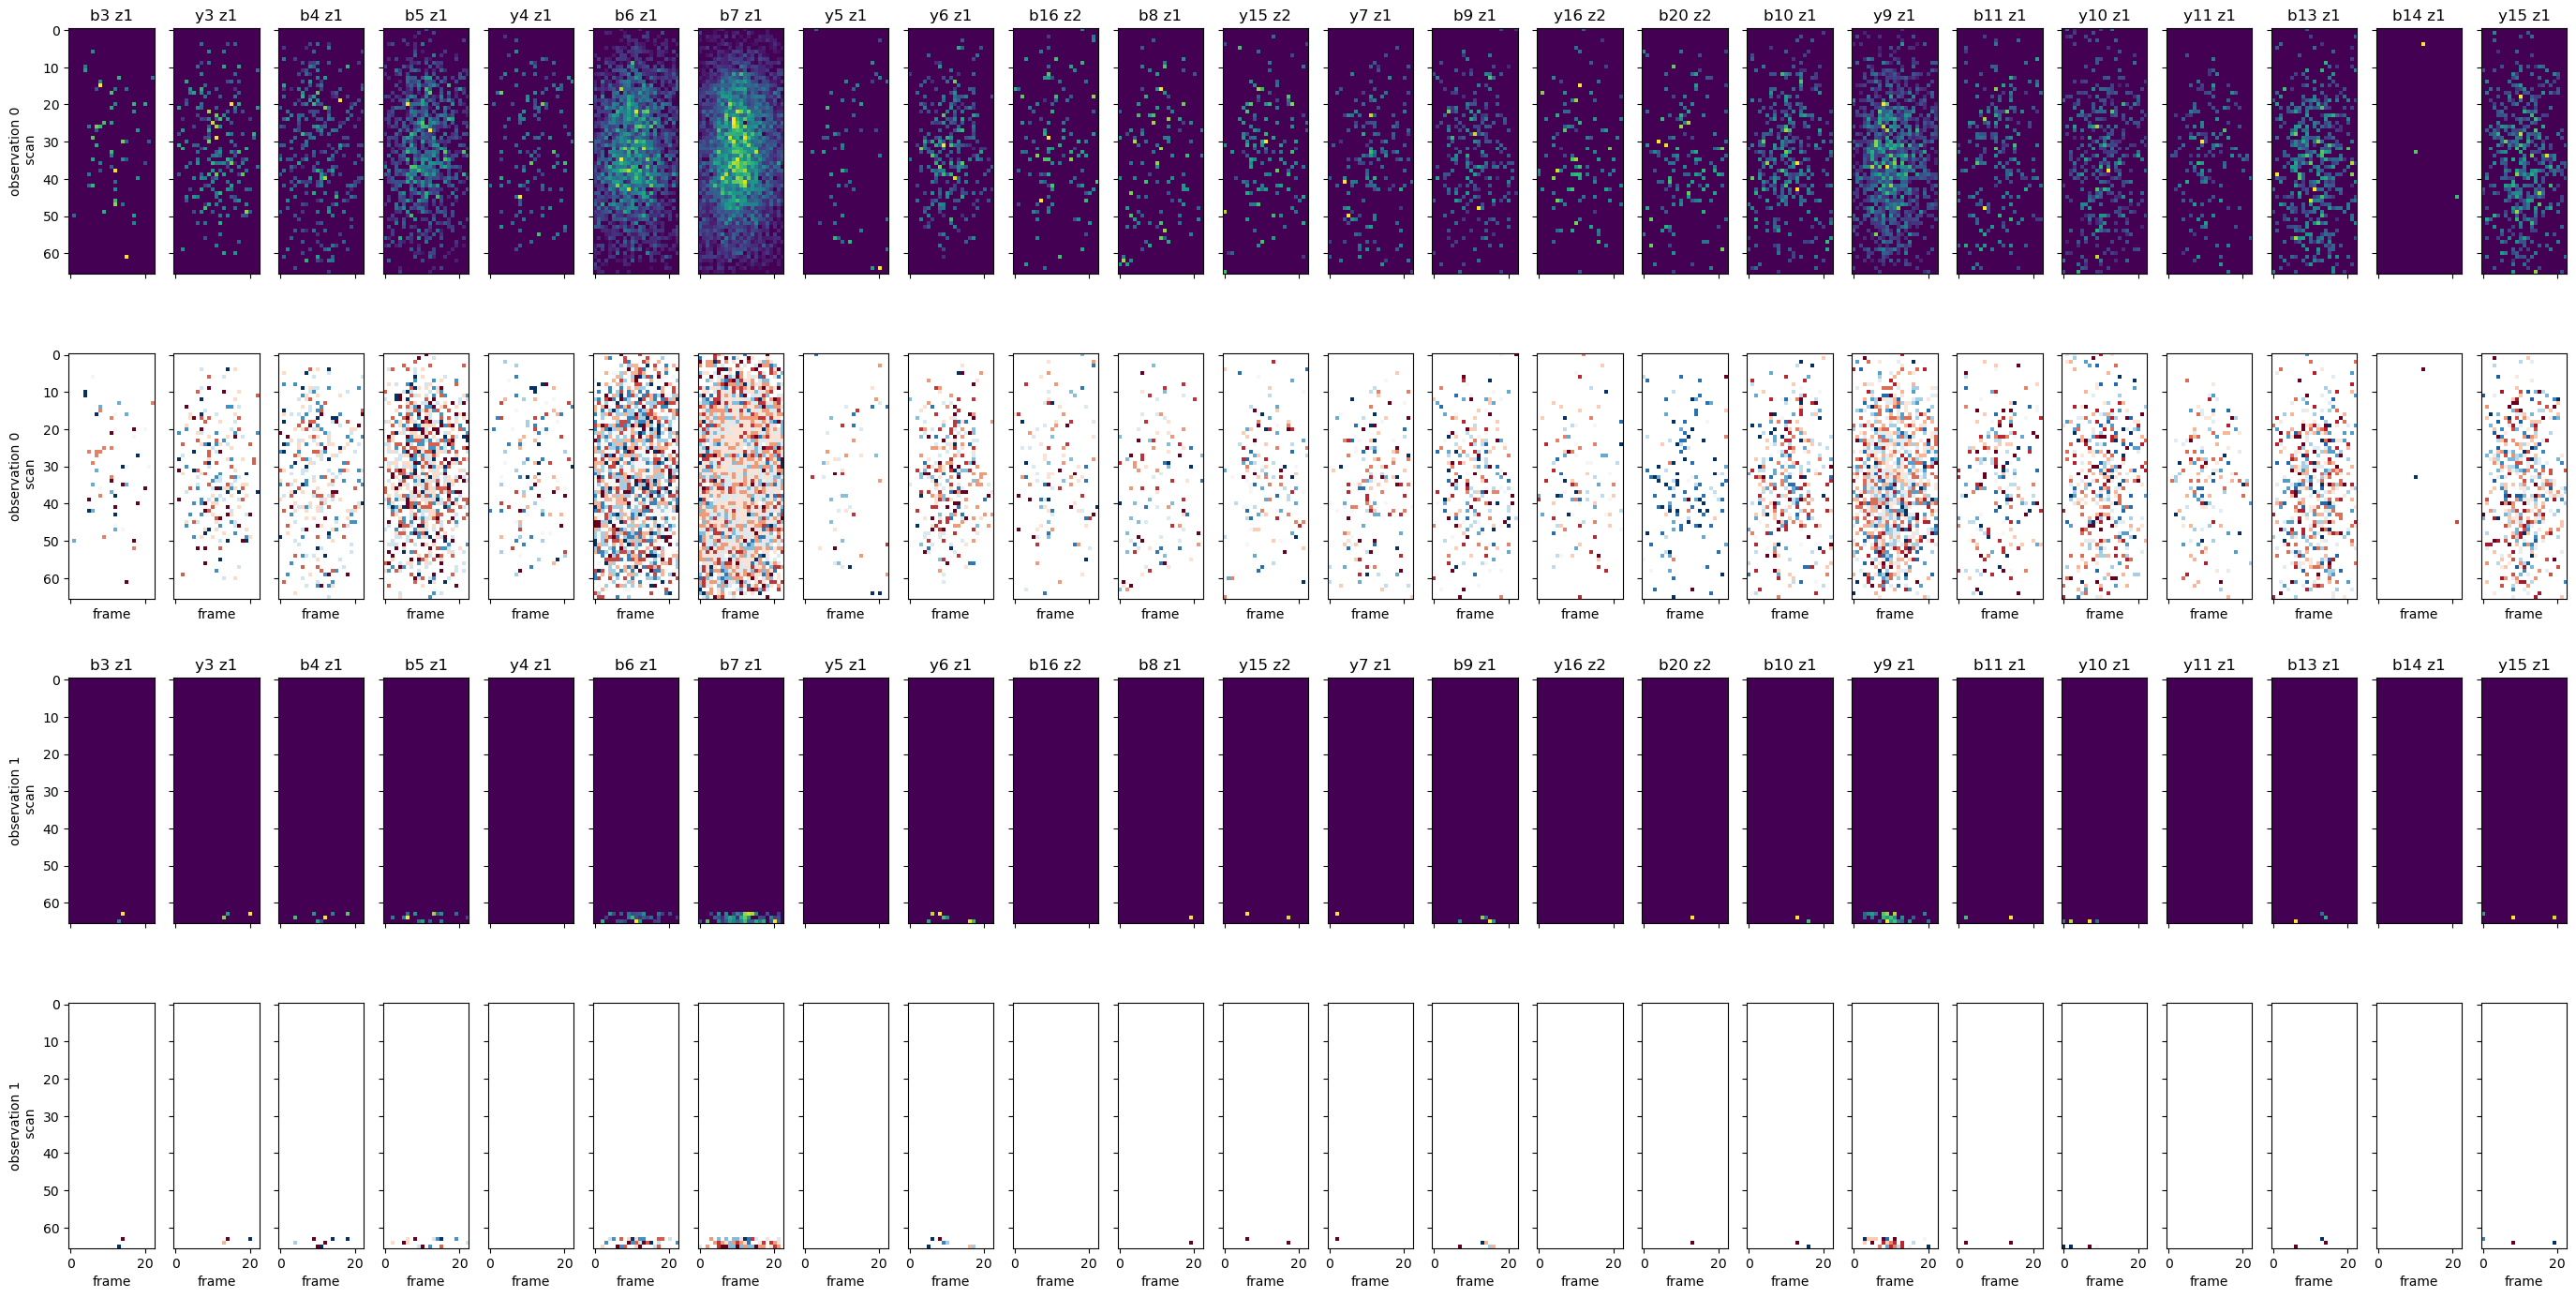

 33%|███▎      | 1/3 [00:08<00:16,  8.13s/it]

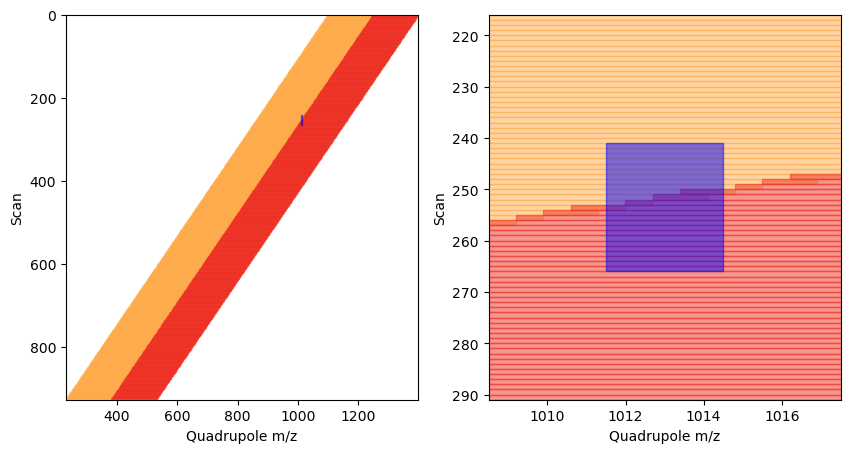

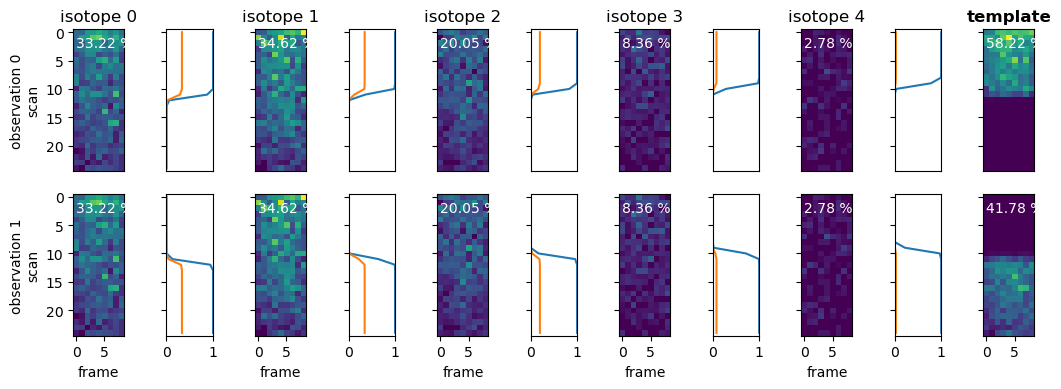

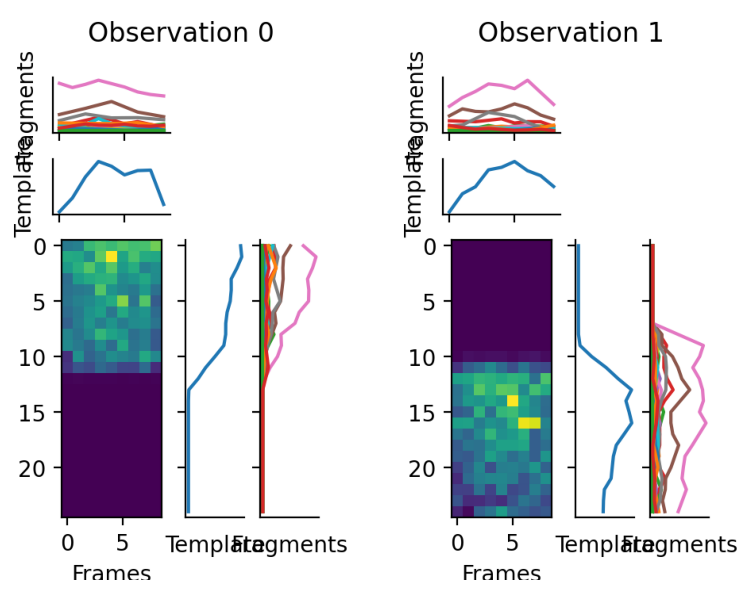

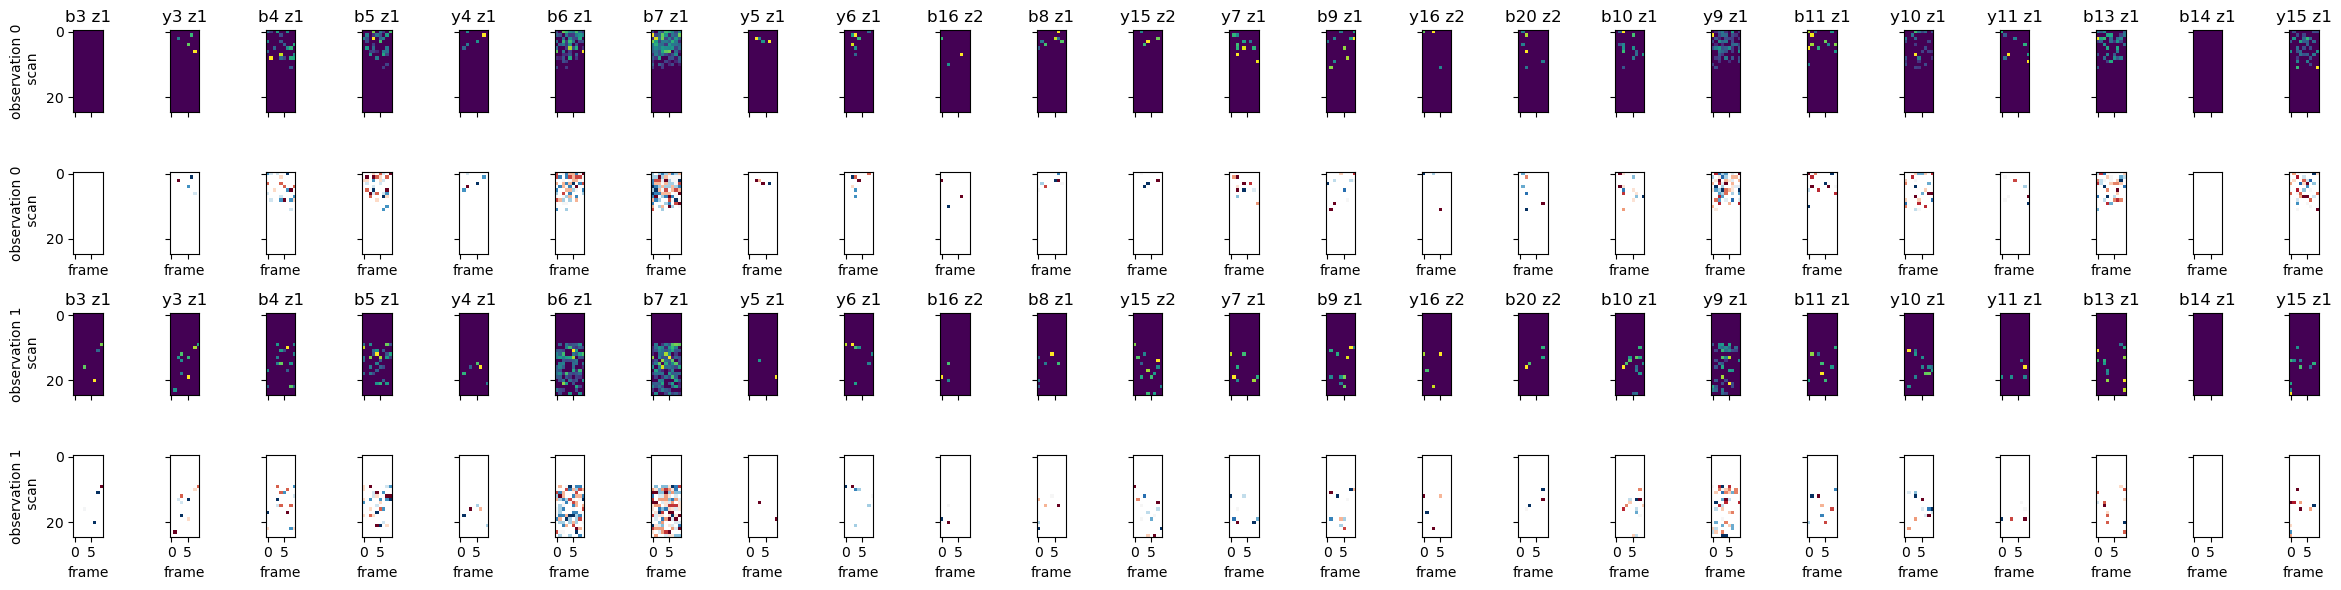

 67%|██████▋   | 2/3 [00:15<00:07,  7.45s/it]

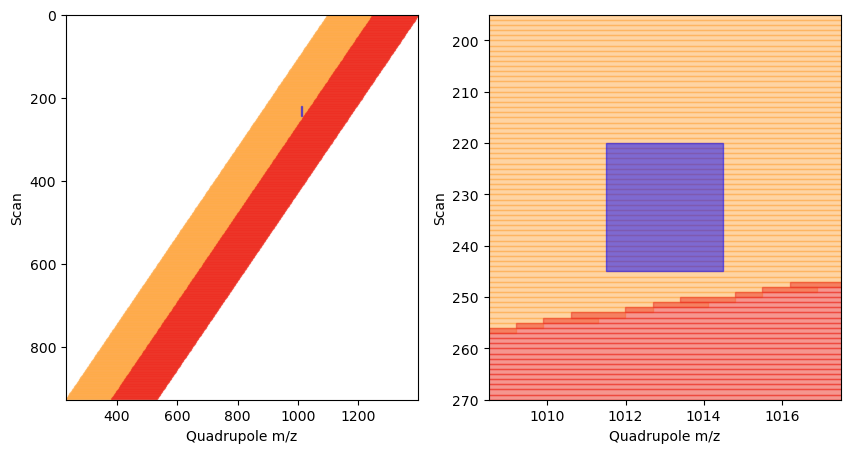

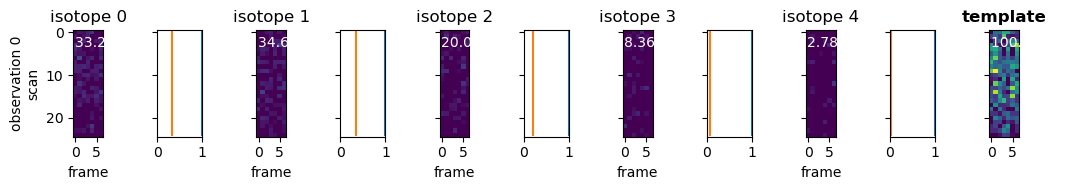

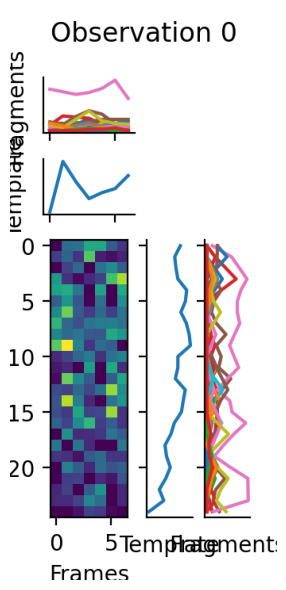

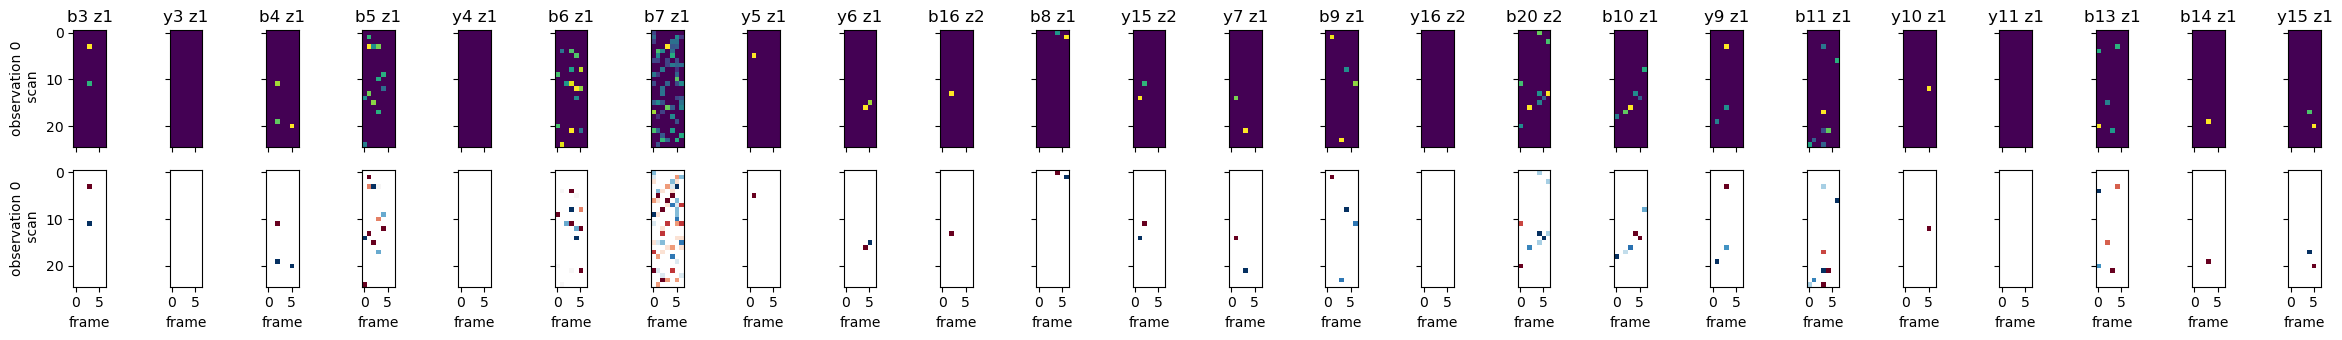

100%|██████████| 3/3 [00:19<00:00,  6.39s/it]


ValueError: too many values to unpack (expected 2)

In [38]:
quad = quadrupole.SimpleQuadrupole(dia_data.cycle)

extraction = scoring.MS2ExtractionWorkflow(
    dia_data.jitclass(),
    precursors_sample,
    fragments_flat,
    candidates_df,
    debug=True,
    quadrupole_calibration = quad,
    rt_column = 'rt_calibrated',
    mobility_column = 'mobility_calibrated',
    precursor_mz_column = 'mz_calibrated',
    fragment_mz_column = 'mz_calibrated',
    precursor_mz_tolerance = 15,
    fragment_mz_tolerance = 15,
    thread_count=10
)
features_df, fragments_df = extraction()

In [44]:
pidx = 130296

frame_limits = np.array([[5305, 7177,    1]], dtype=np.int64)
scan_limits = np.array([[326, 390,   1]], dtype=np.int64)
precursor_mz_limits = np.array([774.8905,  775.39215, 775.89386], dtype=np.float32)
fragment_mz_limits = np.array([248.16068,  361.24463,  476.2713,   533.2926,   590.31384,  718.37195, 878.40186,  977.4698,  1124.5375,  1239.5636,  1336.6157,  1449.699], dtype=np.float32)
quadrupole_mz = np.array([[774.89050293, 775.89385986]], dtype=np.float32)

In [45]:
extend = list(dia_data.mobility_values[[530, 590]])+list(dia_data.rt_values[[8160, 9930]])

In [51]:
jit_data = dia_data.jitclass()
_dense_precursors, _ = jit_data.get_dense(
    frame_limits,
    scan_limits,
    precursor_mz_limits,
    10.,
    np.array([[-1.,-1.]], dtype=np.float32),
    False
)
dense_precursors = _dense_precursors.sum(axis=2)

_dense_fragments, _ = jit_data.get_dense(
    frame_limits,
    scan_limits,
    fragment_mz_limits,
    15.,
    quadrupole_mz,
    False
)

dense_fragment = _dense_fragments.sum(axis=2)


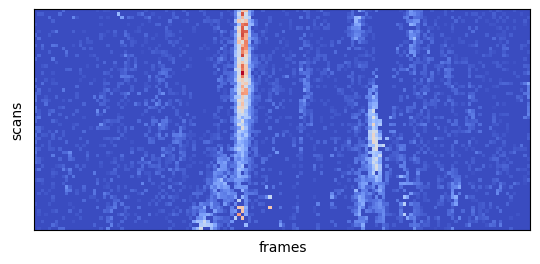

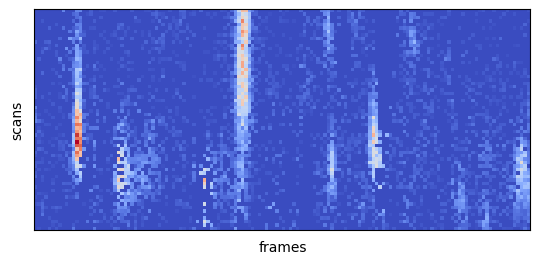

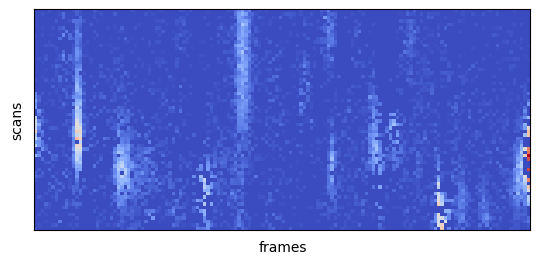

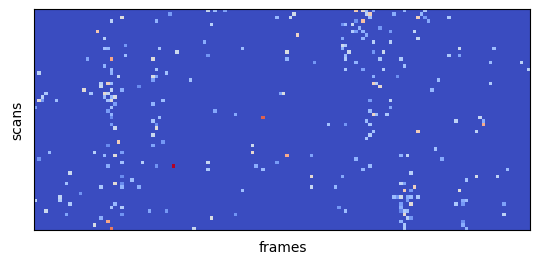

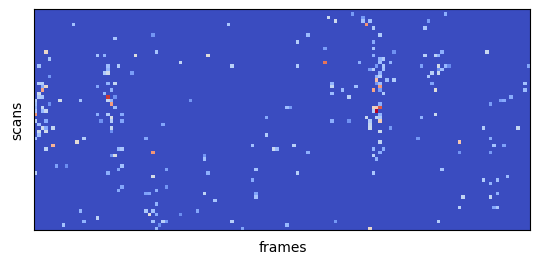

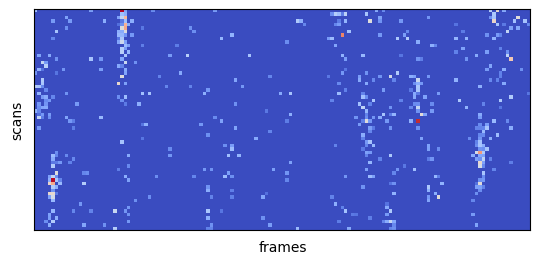

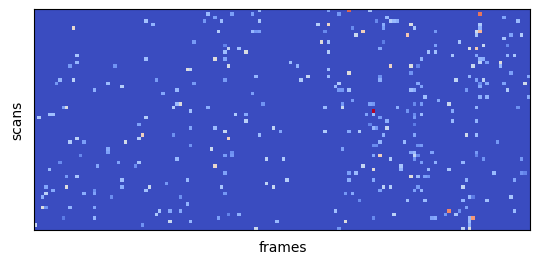

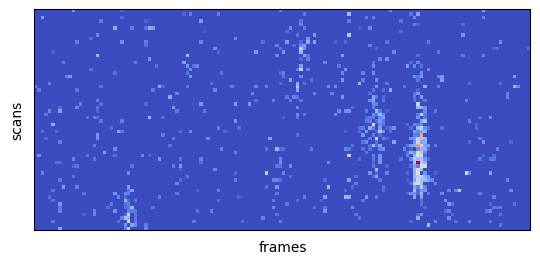

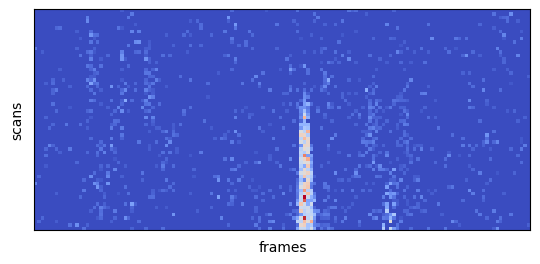

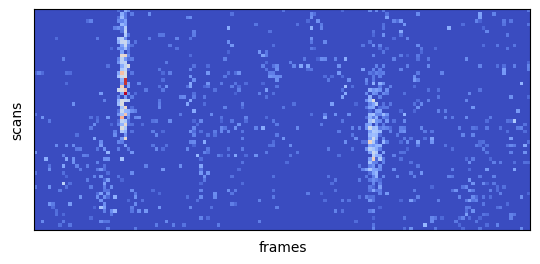

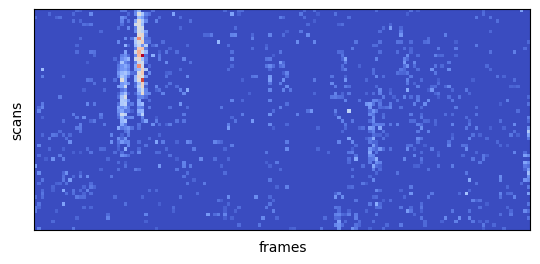

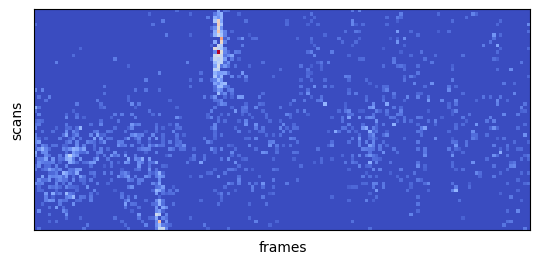

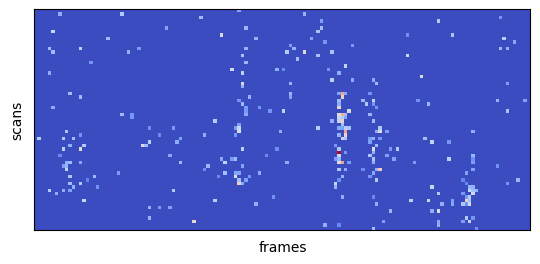

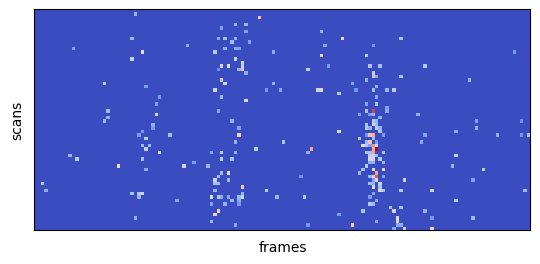

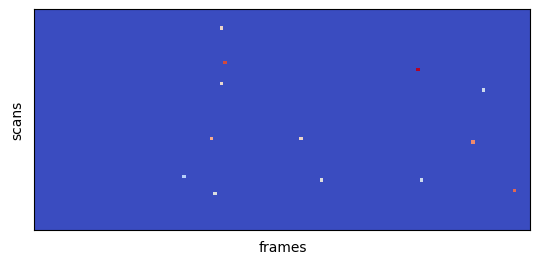

In [63]:
import os
animation_path = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_04_21_kernel_movie/stills'

precursor_profile = dense_precursors[0].sum(axis=(1))
for i in range(dense_precursors.shape[1]):
    plt.imshow(dense_precursors[0,i], cmap='coolwarm', interpolation='none')
    plt.ylabel('scans')
    plt.xlabel('frames')
    plt.xticks([])
    plt.yticks([])
    plt.savefig(os.path.join(animation_path, f'{i:04d}_precursor_dense.png'), dpi=280, bbox_inches='tight')
    plt.show()

for i in range(dense_fragment.shape[1]):
    plt.imshow(dense_fragment[0,i], cmap='coolwarm', interpolation='none')
    plt.ylabel('scans')
    plt.xlabel('frames')
    plt.xticks([])
    plt.yticks([])
    plt.savefig(os.path.join(animation_path, f'{i:04d}_fragment_dense.png'), dpi=280, bbox_inches='tight')
    plt.show()

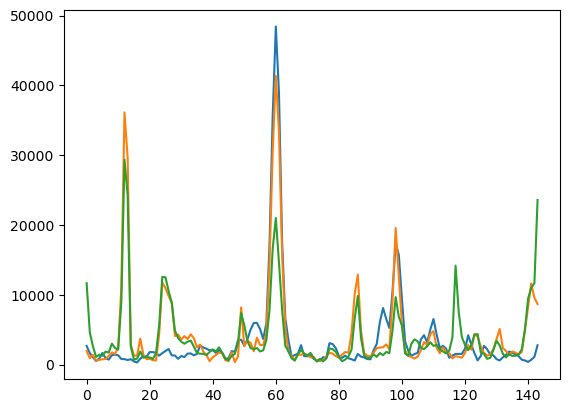

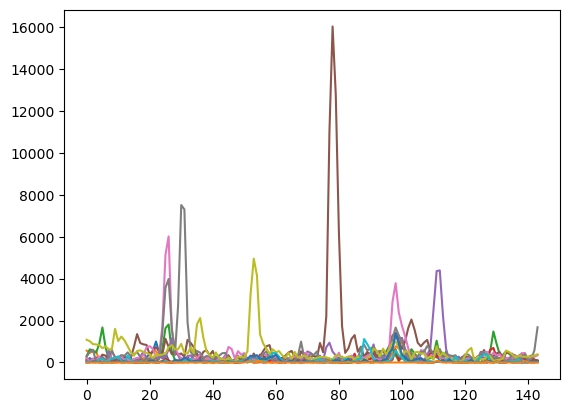

In [53]:
precursor_profile = dense_precursors[0].sum(axis=(1))
for profile in precursor_profile:
    plt.plot(profile)

plt.show()
fragment_profile = dense_fragment[0].sum(axis=(1))
for profile in fragment_profile:
    plt.plot(profile)

In [49]:
def mobility_animation(t):

    return t*0.2+0.01
    
def rt_animation(t):
    return 0.1*t+0.01

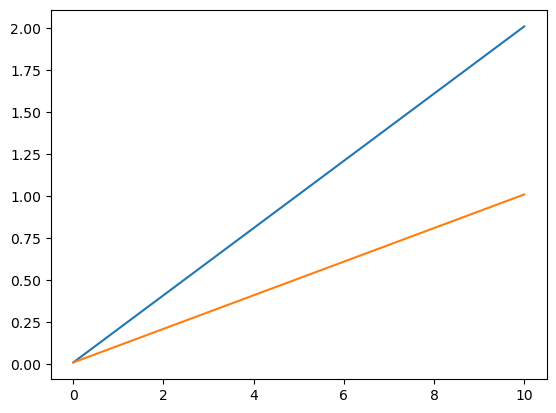

In [299]:
t = np.linspace(0, 10, 1000)
y = np.array([mobility_animation(x) for x in t])
yrt = np.array([rt_animation(x) for x in t])


plt.plot(t, y)
plt.plot(t, yrt)

2:35:43.547837  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
2:35:43.548341  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
2:35:43.548591  INFO: Expected peak length in RT is 10.00 seconds, sigma is 0.04
2:35:43.548851  INFO: Expected peak length in mobility is 0.01 1/K_0, sigma is 0.08
2:35:44.496725  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
2:35:44.497138  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
2:35:44.497410  INFO: Expected peak length in RT is 10.00 seconds, sigma is 0.06
2:35:44.497625  INFO: Expected peak length in mobility is 0.01 1/K_0, sigma is 0.16
2:35:46.622851  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
2:35:46.623228  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
2:35:46.623421  INFO: Expected peak length in RT is 10.00 seconds, sigma is 0.08
2:35:46.623621  INFO: Expected peak length in mobility is 0.01 1/K_0, sigma is 0.25
2:35:49.964285  INFO: 

KeyboardInterrupt: 

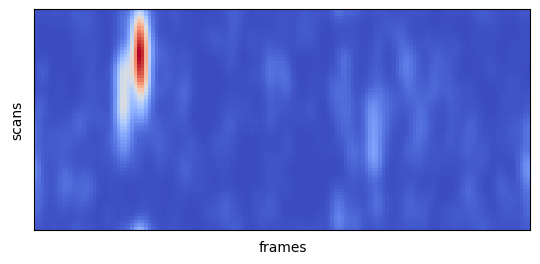

In [62]:
animation_path = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_04_21_kernel_movie/frames'

import os

for i, t in enumerate(np.linspace(0, 10, 180)):
    sigma_scale_rt = rt_animation(t)
    sigma_scale_mobility = mobility_animation(t)

    gaussian_filter = GaussianFilter(dia_data.jitclass(), sigma_scale_rt=sigma_scale_rt, sigma_scale_mobility=sigma_scale_mobility, peak_len_mobility=0.01)
    kernel = gaussian_filter.get_kernel()

    plt.imshow(kernel, cmap='coolwarm')
    plt.xticks([])
    plt.yticks([])
    plt.ylabel('scans')
    plt.xlabel('frames')

    plt.savefig(os.path.join(animation_path, f'{i:04d}_kernel.png'), dpi=280, bbox_inches='tight')

    smooth_precursors = numeric.convolve_fourier_a1(dense_precursors, kernel)
    smooth_fragments = numeric.convolve_fourier_a1(dense_fragment, kernel)

    for j in range(0,1):

        precursor_0_smooth = smooth_precursors[0,j]
        plt.imshow(precursor_0_smooth, cmap='coolwarm', interpolation='none')
        plt.ylabel('scans')
        plt.xlabel('frames')
        plt.savefig(os.path.join(animation_path, f'{i:04d}_precursor_{j}_smooth.png'), dpi=280, bbox_inches='tight')

    for j in range(4,8):

        fragment_0_smooth = smooth_fragments[0,j]
        plt.imshow(fragment_0_smooth, cmap='coolwarm', interpolation='none')
        plt.ylabel('scans')
        plt.xlabel('frames')
        plt.savefig(os.path.join(animation_path, f'{i:04d}_fragment_{j}_smooth.png'), dpi=280, bbox_inches='tight')


1:09:05.183742  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
1:09:05.185587  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
1:09:05.187151  INFO: Expected peak length in RT is 10.00 seconds, sigma is 0.18
1:09:05.190691  INFO: Expected peak length in mobility is 0.01 1/K_0, sigma is 7.73
1:09:05.301688  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
1:09:05.302664  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
1:09:05.303233  INFO: Expected peak length in RT is 10.00 seconds, sigma is 0.36
1:09:05.303677  INFO: Expected peak length in mobility is 0.01 1/K_0, sigma is 7.73
1:09:05.385687  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
1:09:05.387220  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
1:09:05.389792  INFO: Expected peak length in RT is 10.00 seconds, sigma is 0.54
1:09:05.391273  INFO: Expected peak length in mobility is 0.01 1/K_0, sigma is 7.73
1:09:05.470751  INFO: 

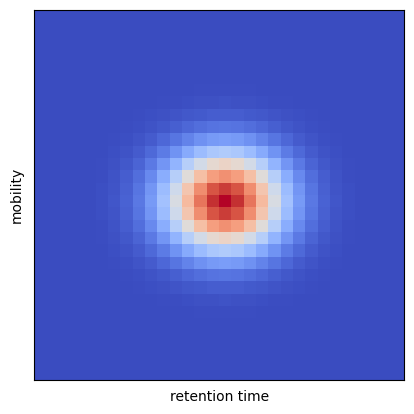

In [59]:
movie_folder = '/Users/georgwallmann/Documents/data/alphadia_benchmarking/alphadia_runs/2023_04_21_kernel_movie'
for frame, sigma_scale_rt in enumerate(np.linspace(0.05, 3, 60)):
    
    plt.imshow(kernel, cmap='coolwarm')
    plt.xticks([])
    plt.yticks([])
    plt.ylabel('mobility')
    plt.xlabel('retention time')

    # pad frame with 3 zeros
    plt.savefig(f'{movie_folder}/kernel_{frame:03d}.png', bbox_inches='tight', pad_inches=0)

1:03:42.239290  INFO: Duty cycle consists of 13 frames, 1.39 seconds cycle time
1:03:42.241009  INFO: Duty cycle consists of 928 scans, 0.00065 1/K_0 resolution
1:03:42.242603  INFO: Expected peak length in RT is 10.00 seconds, sigma is 0.72
1:03:42.243380  INFO: Expected peak length in mobility is 0.01 1/K_0, sigma is 7.73


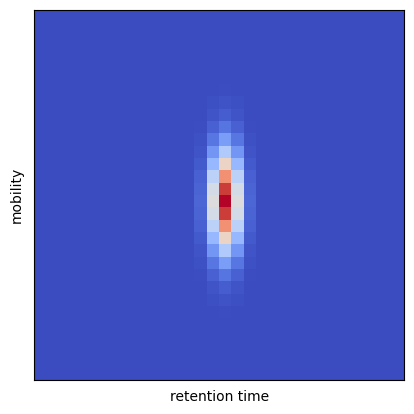

In [56]:
kernel = gaussian_filter.get_kernel()
plt.imshow(kernel, cmap='coolwarm')
plt.xticks([])
plt.yticks([])
plt.ylabel('mobility')
plt.xlabel('retention time')
plt.show()